In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [5]:
# Transform to Tensor and Normalize to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to [0,1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1]
])

# Download and Load
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)


100.0%
100.0%
100.0%
100.0%


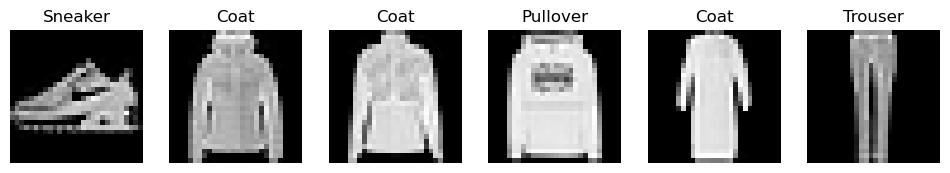

In [6]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels):
    fig, axes = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(classes[labels[i]])
        axes[i].axis('off')

dataiter = iter(train_loader)
images, labels = next(dataiter)
show_images(images, labels)


In [8]:
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(64, 10)  # 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.output(x)
        return x


In [9]:
model = FashionClassifier()

# Loss Function: Cross Entropy for Classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Stochastic Gradient Descent (or Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.5195
Epoch 2/10, Loss: 0.3756
Epoch 3/10, Loss: 0.3376
Epoch 4/10, Loss: 0.3110
Epoch 5/10, Loss: 0.2920
Epoch 6/10, Loss: 0.2772
Epoch 7/10, Loss: 0.2620
Epoch 8/10, Loss: 0.2504
Epoch 9/10, Loss: 0.2369
Epoch 10/10, Loss: 0.2279


In [11]:
correct = 0
total = 0

with torch.no_grad():  # No gradients needed for eval
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 87.90%


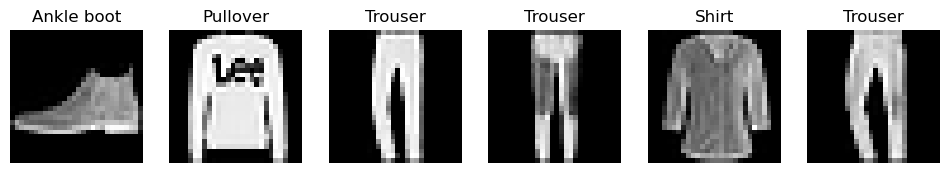

In [12]:
def visualize_predictions(model, loader):
    model.eval()
    images, labels = next(iter(loader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    show_images(images, preds)

visualize_predictions(model, test_loader)


In [ ]:
import pandas as pd
pd.